# ODE(=Ordinary Differential Equation)
## $y'(t)=f(t,y(t))$

In [3]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
m=1.0 #particle's mass
k=1.0 #drag coefficient
g=9.81 #gravity acceleration

In [58]:
#The initial position is (0,0)
v0=np.zeros(4)
#The initial speed vector is oriented to the top right
v0[2]=4.0
v0[3]=10.0

In [59]:
def f(v,t0,k):
    #v has four components: v=[u,u'].
    u,udot=v[:2],v[2:]
    #we compute the second derivative u'' of u.
    udotdot=-k/m * udot
    udotdot[1] -=g
    #we return v'=[u',u''].
    return np.r_[udot,udotdot]

(0, 6)

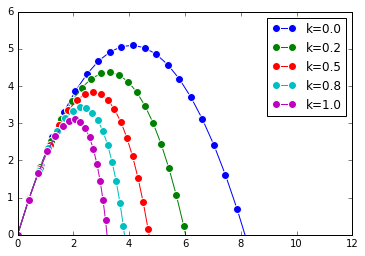

In [60]:
#we want to evaluate the system on 30 linearly
#spaced times between t=0 and t=3.
t=np.linspace(0.,3.,30)
#we simulate th system for different values of k.
for k in np.linspace(0.,1.,5):
    #we simulate the system and evaluate $v$ on the given times.
    v=spi.odeint(f,v0,t,args=(k,))
    #we plot the particle's trajectory.
    plt.plot(v[:,0],v[:,1],'o-',mew=1,ms=8,mec='w',label='k={0:0.1f}'.format(k))
plt.legend()
plt.xlim(0,12)
plt.ylim(0,6)

# PDE

In [4]:
a=2.8e-4
b=5e-3
tau=.1
k=-0.005

In [5]:
size=80
dx=2.0/size
T=10.0
dt=0.9*dx**2/2
n=int(T/dt)
U=np.random.rand(size,size)
V=np.random.rand(size,size)

In [6]:
def laplacian(Z):
    Ztop=Z[0:-2,1:-1]
    Zleft=Z[1:-1,0:-2]
    Zbottom=Z[2:,1:-1]
    Zright=Z[1:-1,2:]
    Zcenter=Z[1:-1,1:-1]
    return (Ztop+Zleft+Zbottom+Zright-4*Zcenter)/dx**2

In [7]:
for i in range(n):
    #We compute the Laplacian of u and v.
    deltaU=laplacian(U)
    deltaV=laplacian(V)
    #We take the values of u and v
    #inside the grid.
    Uc=U[1:-1,1:-1]
    Vc=V[1:-1,1:-1]
    #We compute the variables.
    U[1:-1,1:-1],V[1:-1,1:-1]=(
    Uc+dt*(a*deltaU+Uc-Uc**3-Vc+k),
    Vc+dt*(b*deltaV+Uc-Vc)/tau)
    #Neumann conditions: derivatives at the edges are null
    for Z in (U,V):
        Z[0,:]=Z[1,:]
        Z[-1,:]=Z[-2,:]
        Z[:,0]=Z[:,1]
        Z[:,-1]=Z[:,-2]

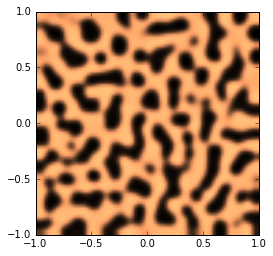

In [8]:
plt.imshow(U,cmap=plt.cm.copper,extent=[-1,1,-1,1])

In [9]:
arr=np.arange(25).reshape(5,5)
rarr=np.arange(25)[::-1].reshape(5,5)
print(arr,rarr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] [[24 23 22 21 20]
 [19 18 17 16 15]
 [14 13 12 11 10]
 [ 9  8  7  6  5]
 [ 4  3  2  1  0]]


In [10]:
arr[0:-2,1:-1]

array([[ 1,  2,  3],
       [ 6,  7,  8],
       [11, 12, 13]])

In [11]:
for z in (arr,rarr):
    print(z[0,:])
    print("hoge")

[0 1 2 3 4]
hoge
[24 23 22 21 20]
hoge
